<a href="https://colab.research.google.com/github/mnafaym17/Module-2---Regression/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA SET 1**

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [9]:
df = pd.read_csv("/content/global_co2.csv")
df.head()

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN


In [10]:
df.fillna(method='ffill', inplace=True)

<ipython-input-10-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [11]:
df.dropna()

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
199,1950,1630,97,423,1070,18,23,0.64
200,1951,1767,115,479,1129,20,24,0.69
201,1952,1795,124,504,1119,22,26,0.68
202,1953,1841,131,533,1125,24,27,0.69
203,1954,1865,138,557,1116,27,27,0.69
...,...,...,...,...,...,...,...,...
255,2006,8370,1525,3089,3339,356,61,1.27
256,2007,8566,1572,3081,3464,382,68,1.28
257,2008,8783,1631,3122,3571,388,71,1.30
258,2009,8740,1585,3056,3620,413,66,1.28


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         260 non-null    int64  
 1   Total        260 non-null    int64  
 2   Gas Fuel     260 non-null    int64  
 3   Liquid Fuel  260 non-null    int64  
 4   Solid Fuel   260 non-null    int64  
 5   Cement       260 non-null    int64  
 6   Gas Flaring  260 non-null    int64  
 7   Per Capita   61 non-null     float64
dtypes: float64(1), int64(7)
memory usage: 16.4 KB


In [13]:
df.isnull().sum()

,0
Year,0
Total,0
Gas Fuel,0
Liquid Fuel,0
Solid Fuel,0
Cement,0
Gas Flaring,0
Per Capita,199


In [14]:
X = df[['Year']].values
y = df['Gas Flaring'].values


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


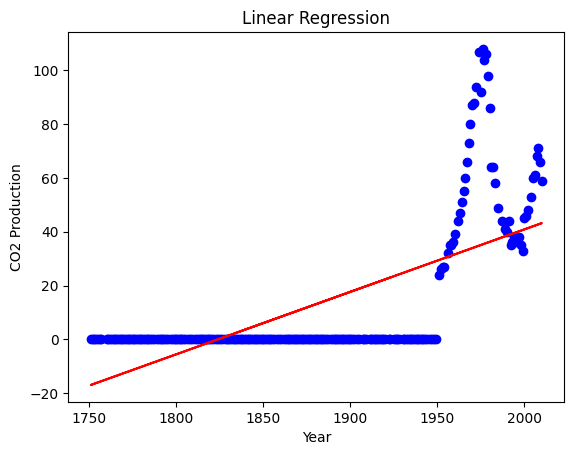

In [16]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_linear = linear_regressor.predict(X_test)
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, linear_regressor.predict(X_train), color='red')
plt.title('Linear Regression')
plt.xlabel('Year')
plt.ylabel('CO2 Production')
plt.show()


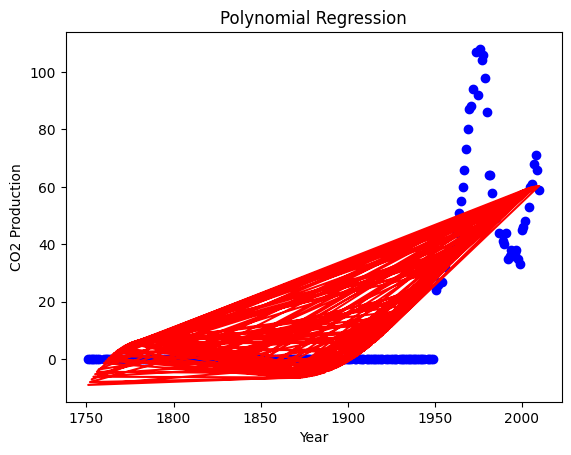

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_train)
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y_train)
X_poly_test = poly.transform(X_test)
y_pred_poly = poly_regressor.predict(X_poly_test)
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, poly_regressor.predict(poly.transform(X_train)), color='red')
plt.title('Polynomial Regression')
plt.xlabel('Year')
plt.ylabel('CO2 Production')
plt.show()


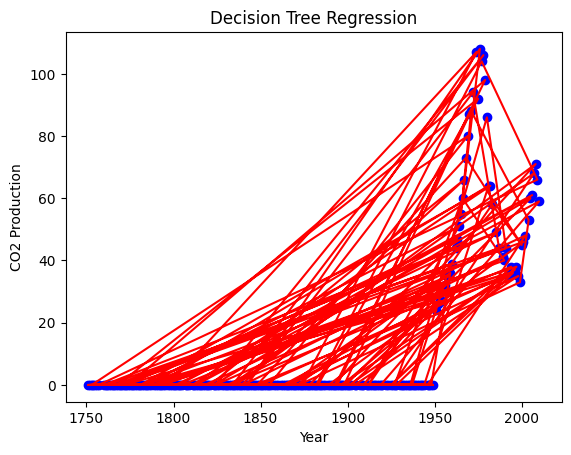

In [18]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)
y_pred_tree = tree_regressor.predict(X_test)
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, tree_regressor.predict(X_train), color='red')
plt.title('Decision Tree Regression')
plt.xlabel('Year')
plt.ylabel('CO2 Production')
plt.show()


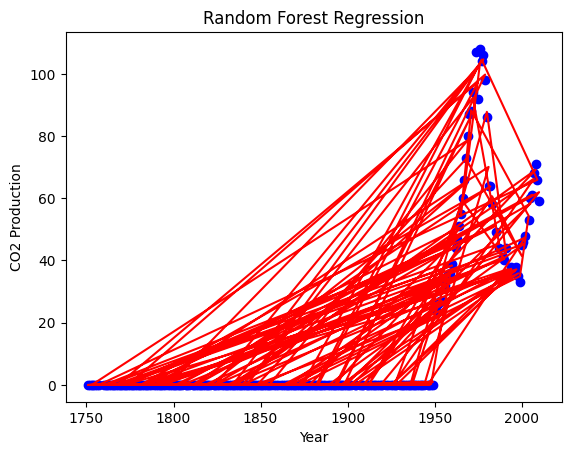

In [19]:
from sklearn.ensemble import RandomForestRegressor
forest_regressor = RandomForestRegressor(n_estimators=100)
forest_regressor.fit(X_train, y_train)
y_pred_forest = forest_regressor.predict(X_test)
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, forest_regressor.predict(X_train), color='red')
plt.title('Random Forest Regression')
plt.xlabel('Year')
plt.ylabel('CO2 Production')
plt.show()


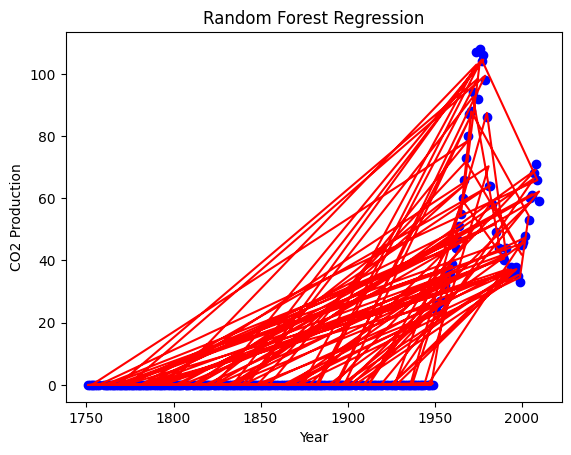

In [20]:
from sklearn.ensemble import RandomForestRegressor
forest_regressor = RandomForestRegressor(n_estimators=100)
forest_regressor.fit(X_train, y_train)
y_pred_forest = forest_regressor.predict(X_test)
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, forest_regressor.predict(X_train), color='red')
plt.title('Random Forest Regression')
plt.xlabel('Year')
plt.ylabel('CO2 Production')
plt.show()


In [21]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
svr_regressor = SVR(kernel='linear')
svr_regressor.fit(X_train, y_train)
y_pred_svr = svr_regressor.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

**DATA SET 2**

In [22]:
data = pd.read_csv('/content/annual_temp.csv')
data.head()


,Source,Year,Mean
0,GCAG,2015,0.8990
1,GISTEMP,2015,0.8700
2,GCAG,2014,0.7402
3,GISTEMP,2014,0.7500
4,GCAG,2013,0.6687


In [23]:
X = data[['Year']].values
y_industry1 = data['Source'].values
y_industry2 = data['Mean'].values


In [24]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('annual_temp.csv')
X = data[['Year']].values
y_industry1 = data['Source'].values
y_industry2 = data['Mean'].value
X_train, X_test, y_train_industry1, y_test_industry1 = train_test_split(
    X, y_industry1, test_size=0.3, random_state=0)
X_train, X_test, y_train_industry2, y_test_industry2 = train_test_split(
    X, y_industry2, test_size=0.3, random_state=0)

In [27]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('annual_temp.csv')
X = data[['Year']].values
y_industry2 = data['Mean'].values
X_train2, X_test2, y_train_industry2, y_test_industry2 = train_test_split(
    X, y_industry2, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
linear_regressor2 = LinearRegression()
linear_regressor2.fit(X_train2, y_train_industry2)

LinearRegression()

In [29]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('annual_temp.csv')
X = data[['Year']].values
y = data['Mean'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state=0)
tree_regressor.fit(X_train, y_train) #
y_train_pred_tree = tree_regressor.predict(X_train)

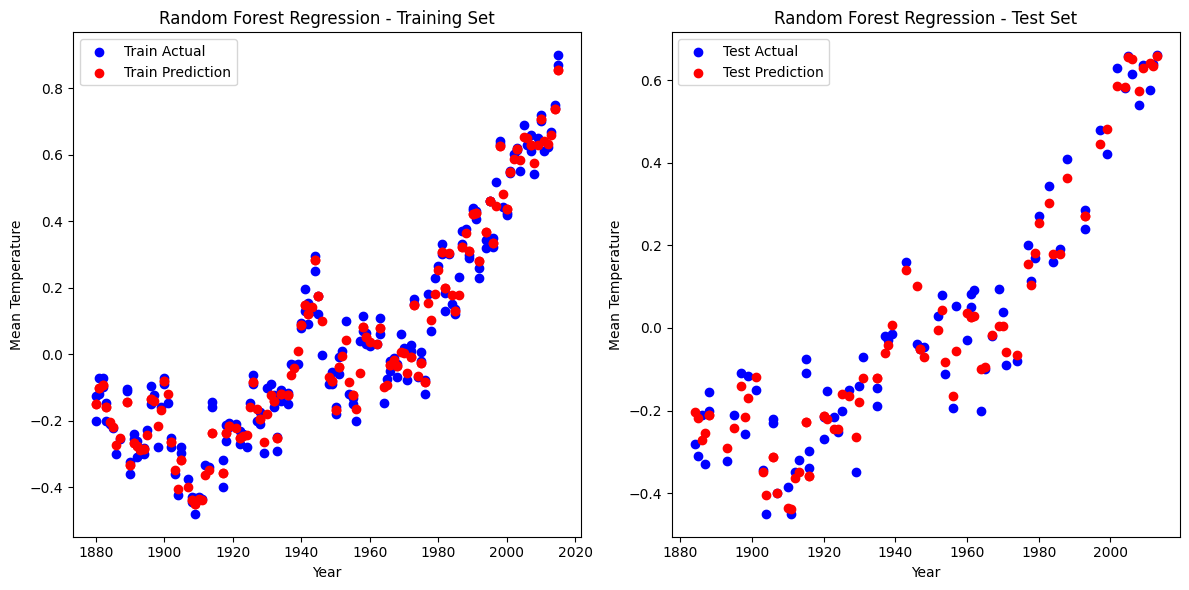

Random Forest Regression:
Train MSE: 0.0008364398905333335
Test MSE: 0.002669407122586721
Train R2 Score: 0.9916527790660479
Test R2 Score: 0.9696179185631151


In [31]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
forest_regressor = RandomForestRegressor(n_estimators=10, random_state=0)
forest_regressor.fit(X_train, y_train)
y_train_pred_forest = forest_regressor.predict(X_train)
y_test_pred_forest = forest_regressor.predict(X_test)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], y_train, color='blue', label='Train Actual')
plt.scatter(X_train[:, 0], y_train_pred_forest, color='red', label='Train Prediction')
plt.title('Random Forest Regression - Training Set')
plt.xlabel('Year')
plt.ylabel('Mean Temperature')
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], y_test, color='blue', label='Test Actual')
plt.scatter(X_test[:, 0], y_test_pred_forest, color='red', label='Test Prediction')
plt.title('Random Forest Regression - Test Set')
plt.xlabel('Year')
plt.ylabel('Mean Temperature')
plt.legend()

plt.tight_layout()
plt.show()
print('Random Forest Regression:')
print('Train MSE:', mean_squared_error(y_train, y_train_pred_forest))
print('Test MSE:', mean_squared_error(y_test, y_test_pred_forest))
print('Train R2 Score:', r2_score(y_train, y_train_pred_forest))
print('Test R2 Score:', r2_score(y_test, y_test_pred_forest))